In [1]:
!pip install -f https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install seaborn scikit-learn

Looking in links: https://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5dw64c0r
  JVM stdout: /tmp/tmp5dw64c0r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5dw64c0r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_ugrz6r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))
print("✅ Dataset Loaded. Shape:", df.shape)
df.head()


Saving bank.csv to bank.csv
✅ Dataset Loaded. Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
print("🧠 Data Types:\n", df.dtypes)
print("\n🔍 Null Values:\n", df.isnull().sum())
print("\n📊 Class Distribution:\n", df['deposit'].value_counts())

🧠 Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

🔍 Null Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

📊 Class Distribution:
 deposit
no     5873
yes    5289
Name: count, dtype: int64


In [5]:
hf = h2o.H2OFrame(df)
target = "deposit"   # Replace with your own
features = hf.columns
features.remove(target)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
print("🎯 Target:", target)
print("🛠️ Features:", features)

🎯 Target: deposit
🛠️ Features: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [7]:
hf.describe()


Rows:11162
Cols:17

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-6847.0,,,,1.0,,2.0,1.0,-1.0,0.0,,
mean,41.2319476796274,,,,,1528.5385235620836,,,,15.658036194230426,,371.9938183121324,2.508421429851285,51.33040673714394,0.8325568894463402,,
maxs,95.0,,,,,81204.0,,,,31.0,,3881.0,63.0,854.0,58.0,,
sigma,11.91336919221552,,,,,3225.413325946149,,,,8.420739541006462,,347.12838571630687,2.7220771816614824,108.75828197197717,2.292007218670508,,
zeros,0,,,,,774,,,,0,,0,0,0,8324,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes


In [8]:
train, test = hf.split_frame(ratios=[0.8], seed=1234)
print("✅ Data Split. Train Rows:", train.nrows, "Test Rows:", test.nrows)

✅ Data Split. Train Rows: 8981 Test Rows: 2181


In [9]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=120, seed=42)
aml.train(x=features, y=target, training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/8
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [11]:
lb = aml.leaderboard
print("🏆 Leaderboard:")
print(lb)

🏆 Leaderboard:
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20250807_154043     0.92781    0.330439  0.89412                 0.132944  0.318985  0.101751
StackedEnsemble_BestOfFamily_2_AutoML_1_20250807_154043  0.927395   0.331291  0.893094                0.134165  0.31938   0.102003
GBM_1_AutoML_1_20250807_154043                           0.927347   0.331535  0.892884                0.13298   0.319287  0.101944
StackedEnsemble_BestOfFamily_1_AutoML_1_20250807_154043  0.92723    0.331808  0.892993                0.133383  0.319441  0.102042
StackedEnsemble_BestOfFamily_3_AutoML_1_20250807_154043  0.927209   0.331764  0.892789                0.134548  0.319592  0.102139
GBM_3_AutoML_1_20250807_154043                           0.924157   0.343341  0.892022                0.135134  0.323531  0.104672
GBM_2_AutoML_1_20250807_154043                           0.921566   

In [12]:
perf = aml.leader.model_performance(test)
print("📈 Model Performance:")
print(perf)


📈 Model Performance:
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.09962975189353716
RMSE: 0.3156418094827381
LogLoss: 0.32431774727126655
AUC: 0.9305417072291633
AUCPR: 0.9053233880082585
Gini: 0.8610834144583266
Null degrees of freedom: 2180
Residual degrees of freedom: 2175
Null deviance: 3021.0358048442627
Residual deviance: 1414.674013597265
AIC: 1426.674013597265

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45221306626981617
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     947   185    0.1634   (185.0/1132.0)
yes    105   944    0.1001   (105.0/1049.0)
Total  1052  1129   0.133    (290.0/2181.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.452213     0.86685   223
max f2                       0.212989     0.92122   290
max f0point5         

In [13]:
print("✅ AUC:", perf.auc())
print("✅ Accuracy:", perf.accuracy())
print("✅ Confusion Matrix:")
print(perf.confusion_matrix())


✅ AUC: 0.9305417072291633
✅ Accuracy: [[0.4952411513149991, 0.8674919761577258]]
✅ Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45221306626981617
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     947   185    0.1634   (185.0/1132.0)
yes    105   944    0.1001   (105.0/1049.0)
Total  1052  1129   0.133    (290.0/2181.0)


In [14]:
preds = aml.leader.predict(test)
preds.head()


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,no,yes
no,0.746995,0.253005
yes,0.195583,0.804417
yes,0.181931,0.818069
yes,0.32979,0.67021
yes,0.196998,0.803002
no,0.751767,0.248233
no,0.860425,0.139575
yes,0.267828,0.732172
no,0.73772,0.26228
yes,0.17914,0.82086


In [15]:
if aml.leader.algo in ['gbm', 'xgboost', 'drf']:
    varimp_plot = aml.leader.varimp(use_pandas=True)
    print("📌 Feature Importance:\n", varimp_plot)

In [16]:
model_path = h2o.save_model(model=aml.leader, path="./", force=True)
print("Model saved to:", model_path)


Model saved to: /content/StackedEnsemble_AllModels_1_AutoML_1_20250807_154043


VISUALIZATIONS

In [17]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Convert predictions and actual labels to pandas DataFrames
preds = aml.leader.predict(test).as_data_frame()
actual = test[target].as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [18]:
# Extract predicted labels and true labels
pred_label = preds['predict']
true_label = actual[target]

In [19]:
# 🟦 Confusion Matrix
cm = confusion_matrix(true_label, pred_label, labels=["yes", "no"])

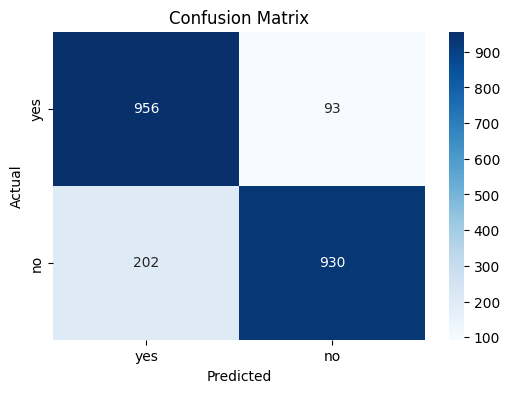

In [20]:
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["yes", "no"], yticklabels=["yes", "no"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# 🟧 ROC Curve and AUC

# Convert labels to binary
true_binary = (true_label == 'yes').astype(int)
prob_yes = preds['yes']  # Probability of class 'yes'

In [22]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(true_binary, prob_yes)
roc_auc = auc(fpr, tpr)

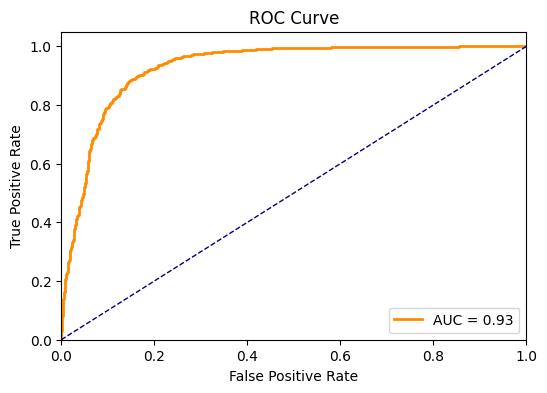

In [23]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()